# Pandas Data Cleaning Checkpoint

This checkpoint is designed to test your understanding of the content from the Pandas Data Cleaning Cumulative Lab.

Specifically, this will cover:

* Using pandas to filter data
* Using pandas to handle missing values
* Using matplotlib to create a graph using data from a dataframe

## Your Task: Analyze Superhero Eye Color

### Data Understanding

In this repository under the file path `data/heroes_information.csv` there is a CSV file containing information about various characters from superhero media properties.

The features of interest for this analysis will be:

`name`: The name (or AKA) of the character

`Eye color`: The eye color of the character

`Alignment`: "good", "bad", or "neutral". For the purposes of this analysis, we will only consider those with "good" alignment to be "superheroes"

### Requirements

#### 1. Filter Data to Relevant Columns

#### 2. Filter Data to Relevant Rows

#### 3. Drop Rows with Missing Values

#### 4. Find the Top 5 Most Common Eye Colors

#### 5. Plot a Bar Chart of Eye Colors

### Setup

In the cell below we import the relevant libraries, open up the CSV file as a dataframe called `df`, and convert cells containing `-` into cells containing `NaN` (because `-` was used to represent missing data in the original dataset).

***Hint:*** If you ever accidentally drop data that you didn't mean to drop, you can come back to this cell and re-run it to load a fresh copy of the data. Before submission, make sure you restart the kernel and run all of the cells to make sure that everything works in order.

In [1]:
# Run this cell without changes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("heroes_information.csv", index_col=0)
df.replace("-", np.nan, inplace=True)

df

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,NaN,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,NaN,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,NaN,bad,-99.0
...,...,...,...,...,...,...,...,...,...,...
729,Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,NaN,good,52.0
730,Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,-99.0
731,Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0
732,Zatanna,Female,blue,Human,Black,170.0,DC Comics,NaN,good,57.0


## 1. Filter Data to Relevant Columns

Modify `df` so that it only contains the relevant columns for our analysis. These columns are listed as a list of strings for your convenience below.

When you are finished with this question, `df` should have the same number of rows as before (734 rows) but only 3 columns.

***Hint:*** if you are seeing the correct output but the test is failing, make sure that you are actually modifying `df`, either by reassigning it (`df = `...) or by using `inplace=True` (where applicable).

In [2]:
# Run this cell without changes
relevant_columns = [
    "name",
    "Eye color",
    "Alignment"
]

In [3]:
# CodeGrade step1
# Replace None with appropriate code

df = df[relevant_columns]

df

,name,Eye color,Alignment
0,A-Bomb,yellow,good
1,Abe Sapien,blue,good
2,Abin Sur,blue,good
3,Abomination,green,bad
4,Abraxas,blue,bad
...,...,...,...
729,Yellowjacket II,blue,good
730,Ymir,white,good
731,Yoda,brown,good
732,Zatanna,blue,good


In [4]:
# df should now have 734 rows and 3 columns
assert df.shape == (734, 3)

## 2. Filter Data to Relevant Rows

Now, modify `df` so that it only contains rows where `Alignment` is `"good"`.

When you are finished with this question, `df` should still have 3 columns, but fewer rows.

In [5]:
# CodeGrade step2
# Replace None with appropriate code

df = df[df["Alignment"]== "good"]

df

,name,Eye color,Alignment
0,A-Bomb,yellow,good
1,Abe Sapien,blue,good
2,Abin Sur,blue,good
6,Adam Monroe,blue,good
7,Adam Strange,blue,good
...,...,...,...
728,Yellowjacket,blue,good
729,Yellowjacket II,blue,good
730,Ymir,white,good
731,Yoda,brown,good


In [6]:
# df should now have 496 rows and 3 columns
assert df.shape == (496, 3)

## 3. Drop Rows with Missing Values

Now that all rows in the dataset are superheroes (alignment of "good"), note that we are missing the eye color for some of them:

In [7]:
# Run this cell without changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 496 entries, 0 to 732
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       496 non-null    object
 1   Eye color  378 non-null    object
 2   Alignment  496 non-null    object
dtypes: object(3)
memory usage: 15.5+ KB


Modify `df` so that it only contains rows where `Eye color` is not missing (i.e. is not NaN).

Again, when you are finished with this question, `df` should still have 3 columns, but fewer rows again.

In [8]:
# CodeGrade step3
# Replace None with appropriate code

df = df.dropna(axis=0, subset=["Eye color"])

df

,name,Eye color,Alignment
0,A-Bomb,yellow,good
1,Abe Sapien,blue,good
2,Abin Sur,blue,good
6,Adam Monroe,blue,good
7,Adam Strange,blue,good
...,...,...,...
728,Yellowjacket,blue,good
729,Yellowjacket II,blue,good
730,Ymir,white,good
731,Yoda,brown,good


In [9]:
# df should now have 378 rows and 3 columns
assert df.shape == (378, 3)

## 4. Find the Top 5 Most Common Eye Colors

Create a variable `top_eye_colors` that represents the top 5 most common eye colors in the dataset. Then create a variable `top_eye_color_counts` that represents the corresponding frequencies.

`top_eye_colors` should be a list of strings, ordered from the most common to the 5th most common. `top_eye_color_counts` should be a list of integers, ordered from the highest count to the 5th highest.

***Hint:*** If you have a list-like data structure (e.g. a pandas series or NumPy array), you can easily convert it to a Python list using `list()`.

In [11]:
# CodeGrade step4
# Replace None with appropriate code
grouped_by_eye_color = df.groupby(["Eye color"])["Eye color"].count().sort_values(ascending=False)
top_eye_colors = list(grouped_by_eye_color.index[:5])
top_eye_color_counts = list(grouped_by_eye_color.values[:5])

print("Colors:", top_eye_colors)
print("Counts:", top_eye_color_counts)

Colors: ['blue', 'brown', 'green', 'red', 'white']
Counts: [167, 86, 51, 19, 12]


In [12]:
# top_eye_colors should be a list of strings
assert type(top_eye_colors) == list
assert type(top_eye_colors[0]) == str

# There should be 5 eye colors in top_eye_colors
assert len(top_eye_colors) == 5

# "blue" should be one of the eye colors in the list
assert "blue" in top_eye_colors

In [13]:
# top_eye_color_counts should be a list of integers
assert type(top_eye_color_counts) == list
assert type(top_eye_color_counts[0]) == int or type(top_eye_color_counts[0]) == np.int64

# There should be 5 values in top_eye_color_counts
assert len(top_eye_color_counts) == 5

# 167 should be one of the counts in the list
assert 167 in top_eye_color_counts

## 5. Plot a Bar Chart of Popular Eye Colors

Create a matplotlib figure called `fig` containing a labeled bar chart with the number of superheroes who have each of the top 5 most popular eye colors (as encoded in `top_eye_colors` and `top_eye_color_counts`). You can find bar chart documentation [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar.html#matplotlib.axes.Axes.bar).

### Alternative Data

If you were not able to complete the previous question, you can use these hard-coded eye colors:

```
red
orange
yellow
green
blue
```

And these hard-coded counts:

```
46
2
19
73
167
```

***Note:*** there is no need to use the above values if you were able to complete the previous question and you have valid `top_eye_colors` and `top_eye_color_counts` variables.

### Starter Code

The starter code creates a figure called `fig` and axes called `ax`. Use those variables in your solution in order to pass the test.

**DO NOT** use the `df.plot` interface to answer this question. Use the `fig` and `ax` variables provided.

Set the *axes* title to `bar_chart_title` specified below.

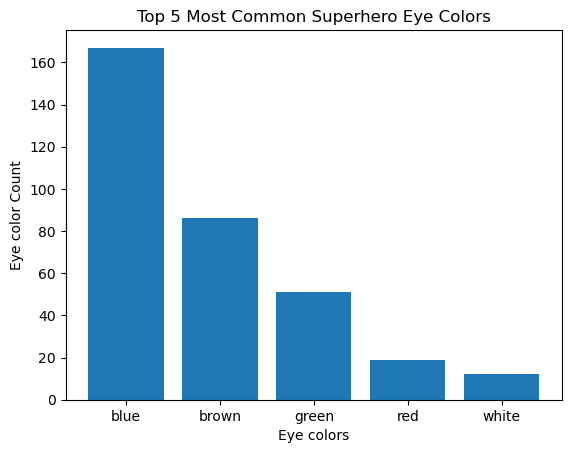

In [15]:
# CodeGrade step5

bar_chart_title = "Top 5 Most Common Superhero Eye Colors"

fig, ax = plt.subplots()

# Your code here
ax.bar(x=top_eye_colors, height=top_eye_color_counts)
ax.set_ylabel("Eye color Count")
ax.set_xlabel("Eye colors")
ax.set_title(bar_chart_title);

In [16]:
# The axis should contain 5 bars
assert len(ax.containers[0]) == 5

# One of the x tick labels should be "blue"
tick_text = [tick.get_text() for tick in ax.get_xticklabels()]
assert "blue" in tick_text